In [30]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv("C:\\Users\\Downloads\\housing.csv", header=None, delimiter=r"\s+", names=column_names)


In [38]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [39]:
# Dimension of the dataset
print(np.shape(df))


(506, 14)


In [40]:
# Let's summarize the data to see the distribution of data
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [41]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


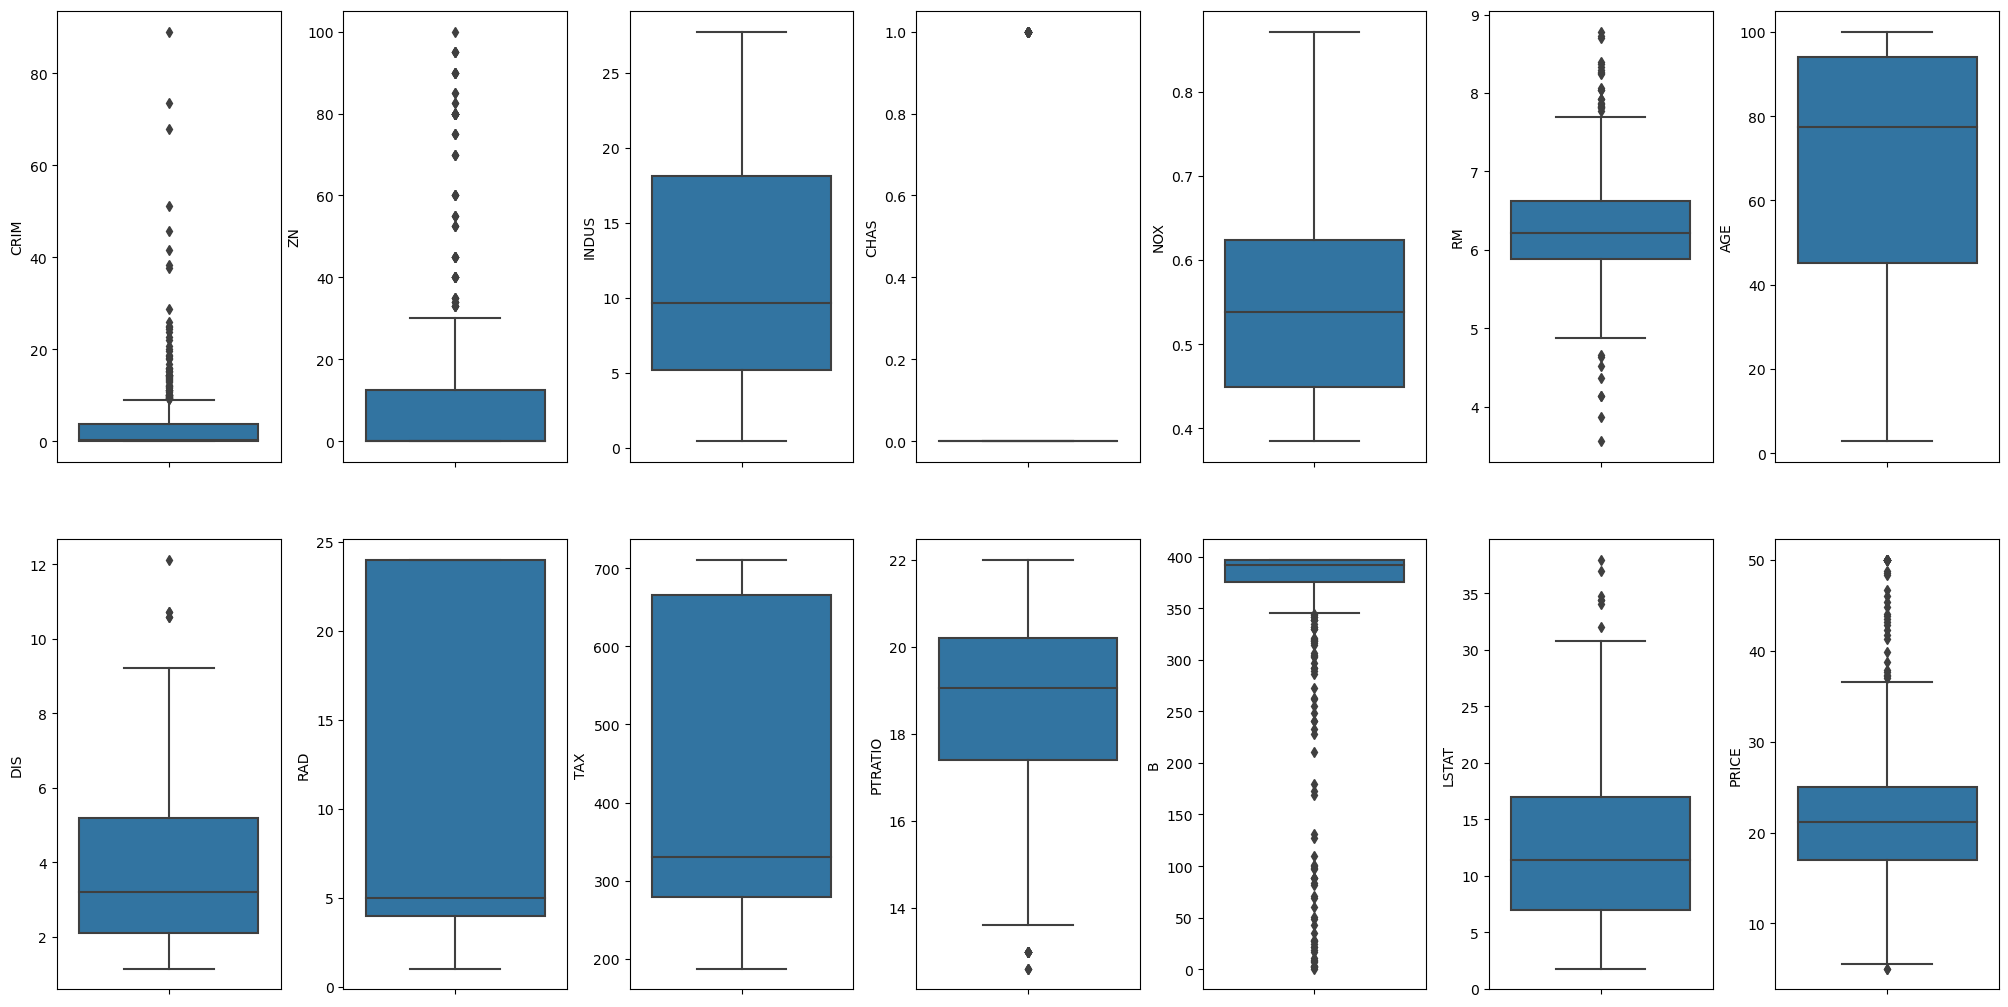

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [43]:
for k, v in df.items():
    if pd.api.types.is_numeric_dtype(v):
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        print(f"{k}: Q1 = {q1}, Q3 = {q3}, IQR = {iqr}")
    else:
        print(f"Skipped column {k} (non-numeric)")


CRIM: Q1 = 0.08204499999999999, Q3 = 3.6770825, IQR = 3.5950375
ZN: Q1 = 0.0, Q3 = 12.5, IQR = 12.5
INDUS: Q1 = 5.19, Q3 = 18.1, IQR = 12.91
CHAS: Q1 = 0.0, Q3 = 0.0, IQR = 0.0
NOX: Q1 = 0.449, Q3 = 0.624, IQR = 0.175
RM: Q1 = 5.8854999999999995, Q3 = 6.6235, IQR = 0.7380000000000004
AGE: Q1 = 45.025, Q3 = 94.07499999999999, IQR = 49.04999999999999
DIS: Q1 = 2.100175, Q3 = 5.1884250000000005, IQR = 3.0882500000000004
RAD: Q1 = 4.0, Q3 = 24.0, IQR = 20.0
TAX: Q1 = 279.0, Q3 = 666.0, IQR = 387.0
PTRATIO: Q1 = 17.4, Q3 = 20.2, IQR = 2.8000000000000007
B: Q1 = 375.3775, Q3 = 396.225, IQR = 20.847500000000025
LSTAT: Q1 = 6.949999999999999, Q3 = 16.955000000000002, IQR = 10.005000000000003
PRICE: Q1 = 17.025, Q3 = 25.0, IQR = 7.975000000000001


In [44]:
df = df[~(df['PRICE'] >= 35.0)]
print(np.shape(df))

(458, 14)


In [45]:
#Looking at the data with names and target variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [46]:
#Shape of the data
print(df.shape)

(458, 14)


In [47]:
#Checking the null values in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [48]:
#Checking the statistics of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,3.880713,10.180131,11.588166,0.058952,0.558875,6.156945,69.170524,3.807797,9.842795,417.893013,18.676201,353.521965,13.490699,20.320087
std,8.973996,21.950057,6.756057,0.235792,0.117724,0.563489,28.008853,2.125004,8.884462,168.736868,2.027875,95.363794,6.967358,6.185151
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.084020,0.000000,5.860000,0.000000,0.453000,5.871250,45.725000,2.100175,4.000000,287.000000,17.600000,373.105000,7.927500,16.200000
50%,0.256510,0.000000,9.900000,0.000000,0.538000,6.152000,78.400000,3.199200,5.000000,345.000000,19.200000,391.880000,12.370000,20.400000
75%,4.082653,0.000000,18.100000,0.000000,0.624000,6.481750,94.300000,5.214600,24.000000,666.000000,20.200000,396.397500,17.302500,23.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,34.900000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     458 non-null    float64
 1   ZN       458 non-null    float64
 2   INDUS    458 non-null    float64
 3   CHAS     458 non-null    int64  
 4   NOX      458 non-null    float64
 5   RM       458 non-null    float64
 6   AGE      458 non-null    float64
 7   DIS      458 non-null    float64
 8   RAD      458 non-null    int64  
 9   TAX      458 non-null    float64
 10  PTRATIO  458 non-null    float64
 11  B        458 non-null    float64
 12  LSTAT    458 non-null    float64
 13  PRICE    458 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 53.7 KB


float64
0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: PRICE, dtype: float64


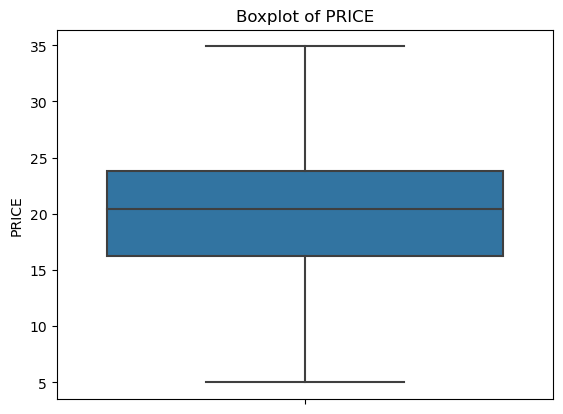

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Check PRICE column
print(df["PRICE"].dtype)
print(df["PRICE"].head())

# Step 2: Force conversion to numeric and drop NaNs
df["PRICE"] = pd.to_numeric(df["PRICE"], errors="coerce")
df_clean = df.dropna(subset=["PRICE"])

# Step 3: Plot boxplot
sns.boxplot(y=df_clean["PRICE"])
plt.title("Boxplot of PRICE")
plt.show()


<Axes: >

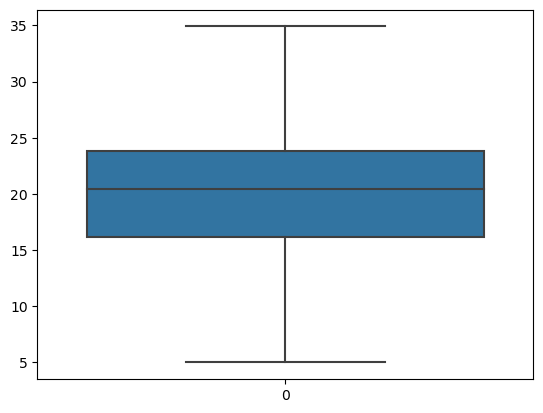

In [51]:
#Distribution using box plot
sns.boxplot(df.PRICE)

In [52]:
#checking Correlation of the data 
correlation = df.corr()
correlation.loc['PRICE']

CRIM      -0.509111
ZN         0.432791
INDUS     -0.598380
CHAS       0.098362
NOX       -0.584249
RM         0.540151
AGE       -0.571890
DIS        0.461164
RAD       -0.515860
TAX       -0.587285
PTRATIO   -0.471471
B          0.404020
LSTAT     -0.780531
PRICE      1.000000
Name: PRICE, dtype: float64

<Axes: >

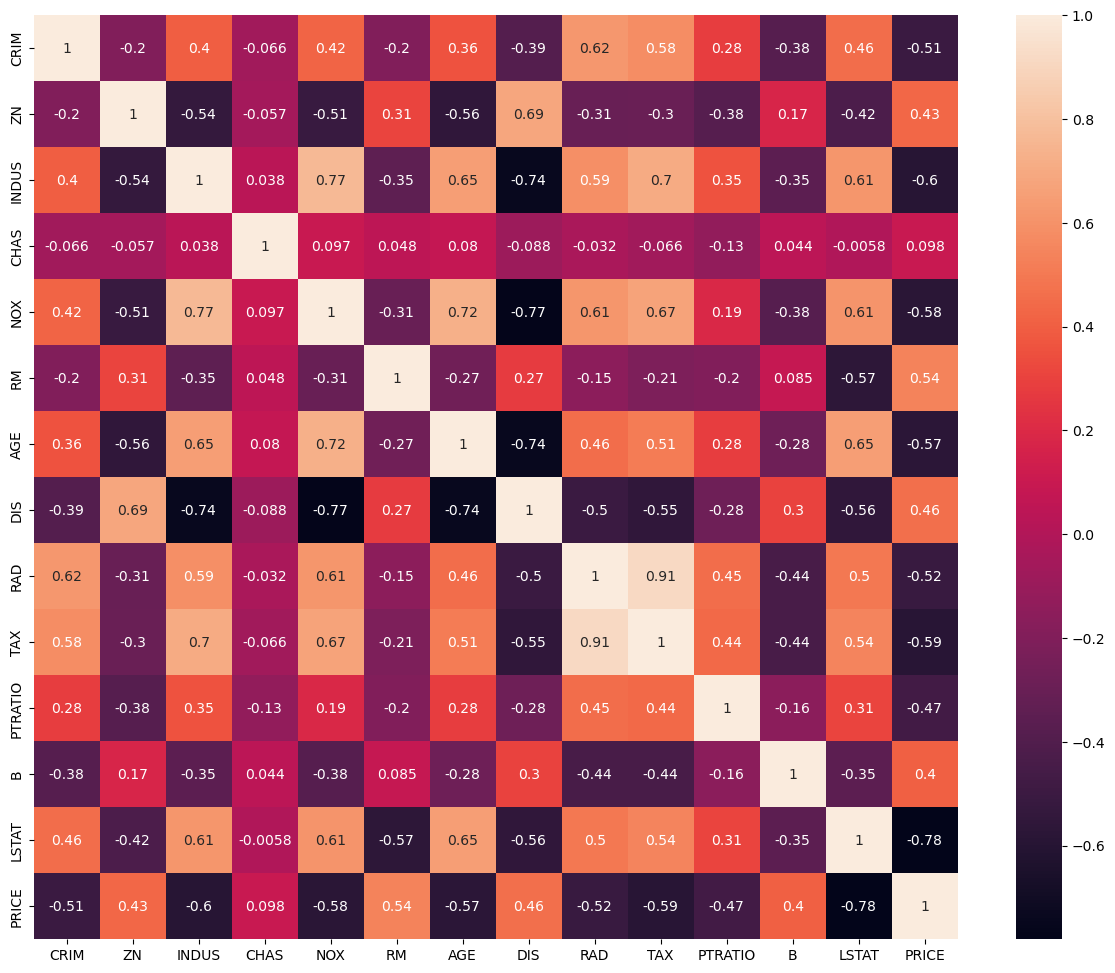

In [53]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

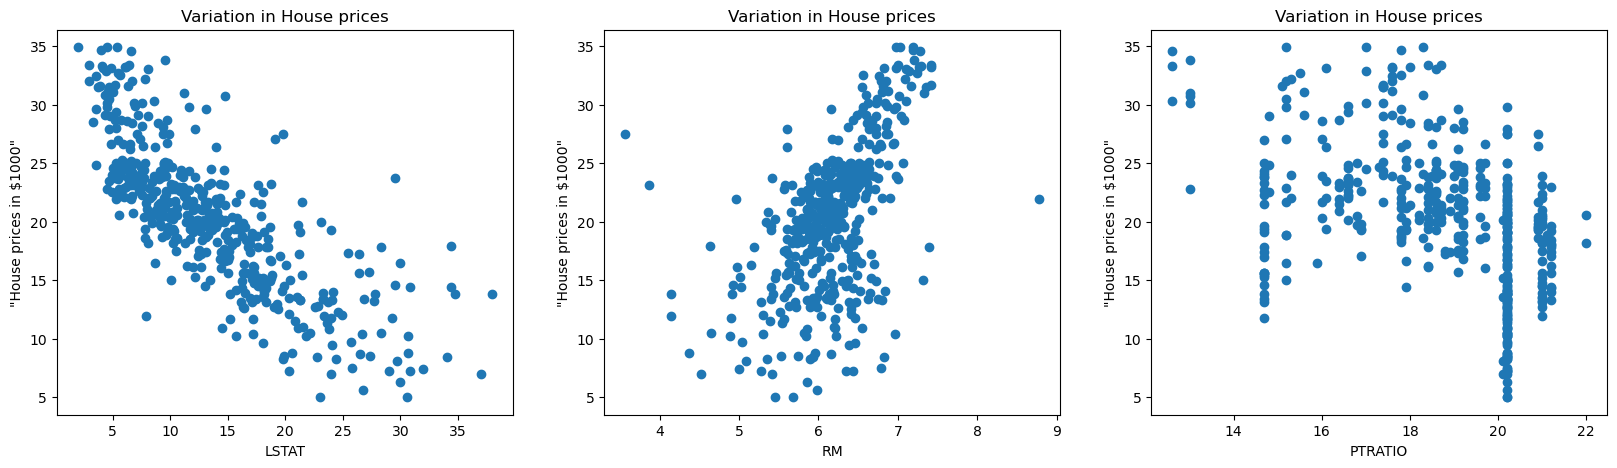

In [54]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [55]:
#X = data[['LSTAT','RM','PTRATIO']]
X = df.iloc[:,:-1]
y= df.PRICE

In [56]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [58]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [59]:
#Fitting the model
regressor.fit(X_train,y_train)

LinearRegression()

In [60]:
#Prediction on the test dataset
y_pred = regressor.predict(X_test)

In [61]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.061315764852675


In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7443761652148483


In [63]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [65]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Creating the neural network model
model = Sequential([
    Input(shape=(13,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
    
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [67]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 437.1916
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 387.5981
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266.2454
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.9632
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.3687
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.4738
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.4730
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.8464 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0679
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.6944
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0568
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4707
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2951
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3156 
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [68]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [69]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8207645747183707


In [70]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

2.5634177102458953
